### About this Dataset
##### Context
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

##### Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

##### Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

##### Acknowledgements
From Udemy's Machine Learning A-Z course.

I am new to Data science field and want to share my knowledge to others

https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv

##### Inspiration
By the end of this case study , you would be able to answer below questions.
1- How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way.
2- Who are your target customers with whom you can start marketing strategy [easy to converse]
3- How the marketing strategy works in real world

https://www.kaggle.com/code/vjchoudhary7/kmeans-clustering-in-customer-segmentation/data

In [187]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Models

from sklearn.cluster import KMeans


In [188]:
df_cost_inc =  pd.read_csv('C:\desarrollo\proyectos\datasets\KMeans Clustering in Customer Segmentation\Mall_Customers.csv')

#df_cost_inc.drop(['CustomerID'], axis=1, inplace=True)
#I remove the autoincremental values from the dataset. I use the natural index

print(df_cost_inc.columns)
print(f'Tamaño dataset : {df_cost_inc.shape}')
df_cost_inc.head(5)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
Tamaño dataset : (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [117]:
df_cost_inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [174]:
df_cost_inc.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Costumer Gender is not relevant to segmentation


Text(0, 0.5, 'Spending Score (1-100)')

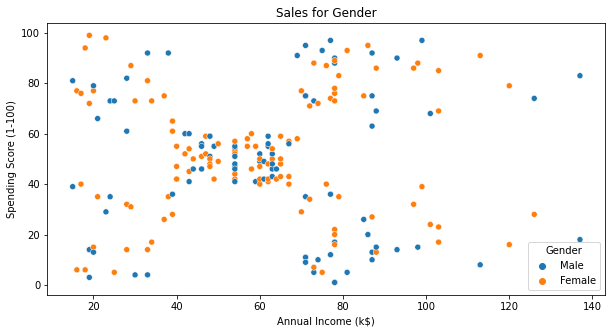

In [178]:
print('Costumer Gender is not relevant to segmentation')
plt.subplots(figsize=(10,5))

sns.scatterplot(x=df_cost_inc['Annual Income (k$)'],y= df_cost_inc['Spending Score (1-100)'],hue=df_cost_inc['Gender'])

plt.title('Sales for Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [180]:
#Feature Selection

X = df_cost_inc.iloc[:,[3,4]]


In [190]:
#We will use kmeans to describe diferent costumer behaviour

wcss =[]  

for i in range(1,11):
    kmean = KMeans(n_clusters=i,init='k-means++', random_state=None)
    kmean.fit(X)
    wcss.append(kmean.inertia_)

c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For 5 clusters the silhouette_score is : 0.45


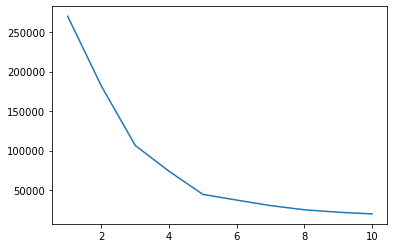

In [198]:
# I alredy plot how the error decrece in funtion to the number of cluster. 

plt.plot(range(1,11),wcss)

from sklearn.metrics import silhouette_score
print(f'For 5 clusters the silhouette_score is : {silhouette_score(X, kmean.labels_).round(2)}')

In [189]:
#Following to the “elbow rule” , I choose five cluster because reduce considerably the error.
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=45)
y_kmeans= kmeansmodel.fit_predict(X)

Text(0, 0.5, 'Spending Score (1-100)')

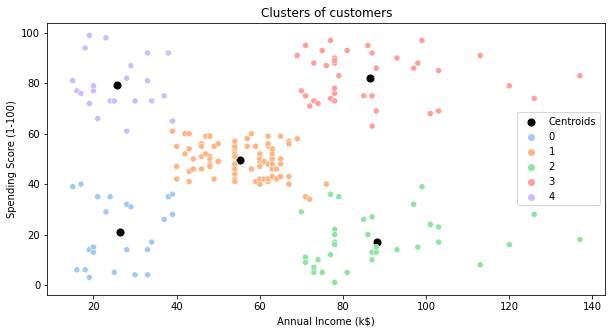

In [186]:
plt.subplots(figsize=(10,5))

plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')

sns.scatterplot(x=X['Annual Income (k$)'],y= X['Spending Score (1-100)'],hue=y_kmeans, palette="pastel")

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

#### Model Interpretation 
- Cluster 0 (Blue Color) ->  Earning less , spending less

- Cluster 1 (Orange Color) -> average in terms of earning and spending 

- Cluster 2 (Green Color) -> earning high but spending less [TARGET SET]

- Cluster 3 (Red Color) -> earning high and also spending high  [TARGET SET]

- Cluster 4 (Violet Color) -> earning less but spending more


##### We can put Cluster 3 (Green Cluster) into some alerting system where email can be send to them on daily basis as these re easy to converse ######
##### Also, for the cluster 0 (Blue Cluster), you can offer products in funtion to their preference to improve the engagement
